<a href="https://colab.research.google.com/github/Farmhouse121/Financial-Data-Science-in-Python/blob/main/The%20Market's%20Not%20Normal/Fundamental_Law.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from my_library import *

18:01:59 Starting...
18:01:59 Installing yfinance into Google notebook...
18:02:06 Installing arch into Google notebook...
18:02:18 Initialized.


In [105]:
from requests import get
from io import StringIO
ics=pd.read_csv(StringIO("\n".join(get("https://s3.amazonaws.com/public.gillerinvestments.com/ics.csv").text.split("\n")[5:])))\
    .set_index('Ticker').rename(columns={"Sharpe Ratio":("Expected","Sharpe"),"Sharpe Std.Err":("Expected","Std.Err.")})
ics.columns=pd.MultiIndex.from_tuples(map(lambda x:x if isinstance(x,tuple) else (x,""),ics.columns))
display(ics)

IC Sample  Std.Error t Statistic   p Value  Expected            \
                                                             Sharpe  Std.Err.   
Ticker                                                                          
TLT     16.294625    236   6.551218    2.487267  0.006436  2.586692  1.033342   
TBT     15.125077    236   6.551218    2.308743  0.010479  2.401032  1.033342   
TBX     14.658466    173   7.669650    1.911230  0.027988  2.326959  1.206916   
TLH     13.841704     79  11.470787    1.206692  0.113775  2.197302  1.786022   
PST     13.161656    173   7.669650    1.716070  0.043075  2.089348  1.206916   
IEF     11.621618    208   6.984303    1.663962  0.048060  1.844875  1.100699   
BND      9.965509    185   7.412493    1.344421  0.089406  1.581976  1.167117   
IEI      8.606282    208   6.984303    1.232232  0.108931  1.366205  1.100699   
GLD     -0.452115    224   6.726728   -0.067212  0.526793 -0.071771  1.060660   
DIA     -0.924322    236   6.551218   -0.141092  0.556101 -0.146732  1.033342   
UUP     -1.754910    218   6.819943   -0.257320  0.601534 -0.278583  1.075157   
UDOW    -2.000817    236   6.551218   -0.305411  0.619974 -0.317620  1.033342   
TQQQ    -2.147313    236   6.551218   -0.327773  0.628458 -0.340875  1.033342   
QQQ     -2.184140    236   6.551218   -0.333395  0.630582 -0.346722  1.033342   
SPY     -2.882906    236   6.551218   -0.440056  0.670052 -0.457647  1.033342   
IWM     -3.133418    225   6.711561   -0.466869  0.679703 -0.497415  1.058301   
RWM     -3.440395    225   6.711561   -0.512607  0.695887 -0.546146  1.058301   
SH      -3.626407    236   6.551218   -0.553547  0.710056 -0.575674  1.033342   
SPXL    -3.730236    236   6.551218   -0.569396  0.715456 -0.592157  1.033342   
DOG     -4.329022    236   6.551218   -0.660797  0.745629 -0.687211  1.033342   
UDN     -7.210961    214   6.884284   -1.047453  0.852555 -1.144705  1.085159   

             First        Last Significance  
                                             
Ticker                                       
TLT     2023-01-30  2024-01-05           **  
TBT     2023-01-30  2024-01-05            *  
TBX     2023-05-01  2024-01-05            *  
TLH     2023-09-14  2024-01-05          NaN  
PST     2023-05-01  2024-01-05            *  
IEF     2023-03-10  2024-01-05            *  
BND     2023-04-13  2024-01-05          NaN  
IEI     2023-03-10  2024-01-05          NaN  
GLD     2023-02-15  2024-01-05          NaN  
DIA     2023-01-30  2024-01-05          NaN  
UUP     2023-02-24  2024-01-05          NaN  
UDOW    2023-01-30  2024-01-05          NaN  
TQQQ    2023-01-30  2024-01-05          NaN  
QQQ     2023-01-30  2024-01-05          NaN  
SPY     2023-01-30  2024-01-05          NaN  
IWM     2023-02-14  2024-01-05          NaN  
RWM     2023-02-14  2024-01-05          NaN  
SH      2023-01-30  2024-01-05          NaN  
SPXL    2023-01-30  2024-01-05          NaN  
DOG     2023-01-30  2024-01-05          NaN  
UDN     2023-02-24  2024-01-05          NaN

In [106]:
srs=pd.read_csv(StringIO("\n".join(get("https://s3.amazonaws.com/public.gillerinvestments.com/sharpes.csv").text.split("\n")[2:])))\
    .rename(columns={"Unnamed: 0":"Ticker","Sharpe":("Actual","Sharpe"),"Std.Err.":("Actual","Std.Err.")}).set_index("Ticker")
srs.columns=pd.MultiIndex.from_tuples(map(lambda x:x if isinstance(x,tuple) else (x,""),srs.columns))
display(srs)

Mean  Std.Dev. Sample    Kurtosis   t Score   p Value Annualized  \
                                                                               
Ticker                                                                         
TBX     0.032012  0.259985    238   10.057353  1.899550  0.029353   8.399883   
QQQ     0.126844  1.095125    238    2.842878  1.786877  0.037618  37.636250   
Total   0.082912  0.774584    238    4.126439  1.651352  0.049996  23.226352   
TBT     0.114466  1.083166    238   15.536725  1.630308  0.052182  33.414278   
TQQQ    0.266135  2.763880    238    3.591183  1.485493  0.069371  95.378446   
SPY     0.065681  0.770125    238    2.917280  1.315738  0.094767  17.993891   
TLH     0.040271  0.475477    238    9.640800  1.306611  0.096306  10.678715   
DOG     0.002478  0.038228    238  241.000000  1.000000  0.159165   0.626384   
DIA     0.043295  0.685311    238    3.237501  0.974624  0.165370  11.525104   
PST     0.024816  0.413601    238   14.648042  0.925651  0.177785   6.452609   
SPXL    0.133546  2.355835    238    2.748631  0.874530  0.191357  39.977536   
BND     0.015334  0.334370    238    5.139102  0.707469  0.239985   3.939402   
GLD     0.034078  0.764070    238    4.988199  0.688060  0.246044   8.965516   
TLT     0.037588  0.939749    238    3.916103  0.617050  0.268897   9.933208   
UDOW    0.069072  2.060162    238    3.199899  0.517233  0.302738  19.005598   
IEI     0.008503  0.258464    238    5.544726  0.507531  0.306127   2.165794   
UUP     0.006538  0.318114    238    6.942503  0.317064  0.375737   1.661152   
IWM     0.015057  1.141244    238    5.198491  0.203544  0.419442   3.867064   
IEF    -0.002281  0.428944    238    4.533853 -0.082027  0.532653  -0.573093   
SH     -0.003052  0.107202    238   87.572652 -0.439139  0.669519  -0.766045   
UDN    -0.005102  0.156305    238    9.939653 -0.503610  0.692499  -1.277622   
RWM    -0.013222  0.367981    238   33.807593 -0.554336  0.710064  -3.277348   

          Actual           Significance  
          Sharpe  Std.Err.               
Ticker                                   
TBX     1.954621  3.196671            *  
QQQ     1.838681  1.645607            *  
Total   1.699227  1.856980            *  
TBT     1.677573  3.447889          NaN  
TQQQ    1.528559  1.631388          NaN  
SPY     1.353883  1.410354          NaN  
TLH     1.344492  2.278909          NaN  
DOG     1.028992  8.265909          NaN  
DIA     1.002880  1.286281          NaN  
PST     0.952487  2.082401          NaN  
SPXL    0.899884  1.197353          NaN  
BND     0.727980  1.280416          NaN  
GLD     0.708008  1.260166          NaN  
TLT     0.634940  1.170477          NaN  
UDOW    0.532229  1.106245          NaN  
IEI     0.522245  1.177682          NaN  
UUP     0.326256  1.107366          NaN  
IWM     0.209445  1.052414          NaN  
IEF    -0.084405  1.032225          NaN  
SH     -0.451870  2.395416          NaN  
UDN    -0.518211  1.301651          NaN  
RWM    -0.570407  1.970888          NaN

In [152]:
from statsmodels.api import add_constant
from statsmodels.regression.linear_model import OLS

ics[list(map(lambda x:("Actual",x),srs["Actual"].columns))]=srs["Actual"]
data=ics.xs("Sharpe",axis=1,level=1)
display(data)
model=OLS(data["Actual"],add_constant(data["Expected"])).fit()
nprint("Naive Regression Analysis\n",model.summary())

w=model.wald_test("const=0,Expected=1",scalar=True)

,Expected,Actual
Ticker,,
TLT,2.586692,0.634940
TBT,2.401032,1.677573
TBX,2.326959,1.954621
TLH,2.197302,1.344492
PST,2.089348,0.952487
IEF,1.844875,-0.084405
BND,1.581976,0.727980
IEI,1.366205,0.522245
GLD,-0.071771,0.708008


19:38:46 Naive Regression Analysis
                             OLS Regression Results                            
Dep. Variable:                 Actual   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     2.646
Date:                Mon, 08 Jan 2024   Prob (F-statistic):              0.120
Time:                        19:38:46   Log-Likelihood:                -21.738
No. Observations:                  21   AIC:                             47.48
Df Residuals:                      19   BIC:                             49.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0

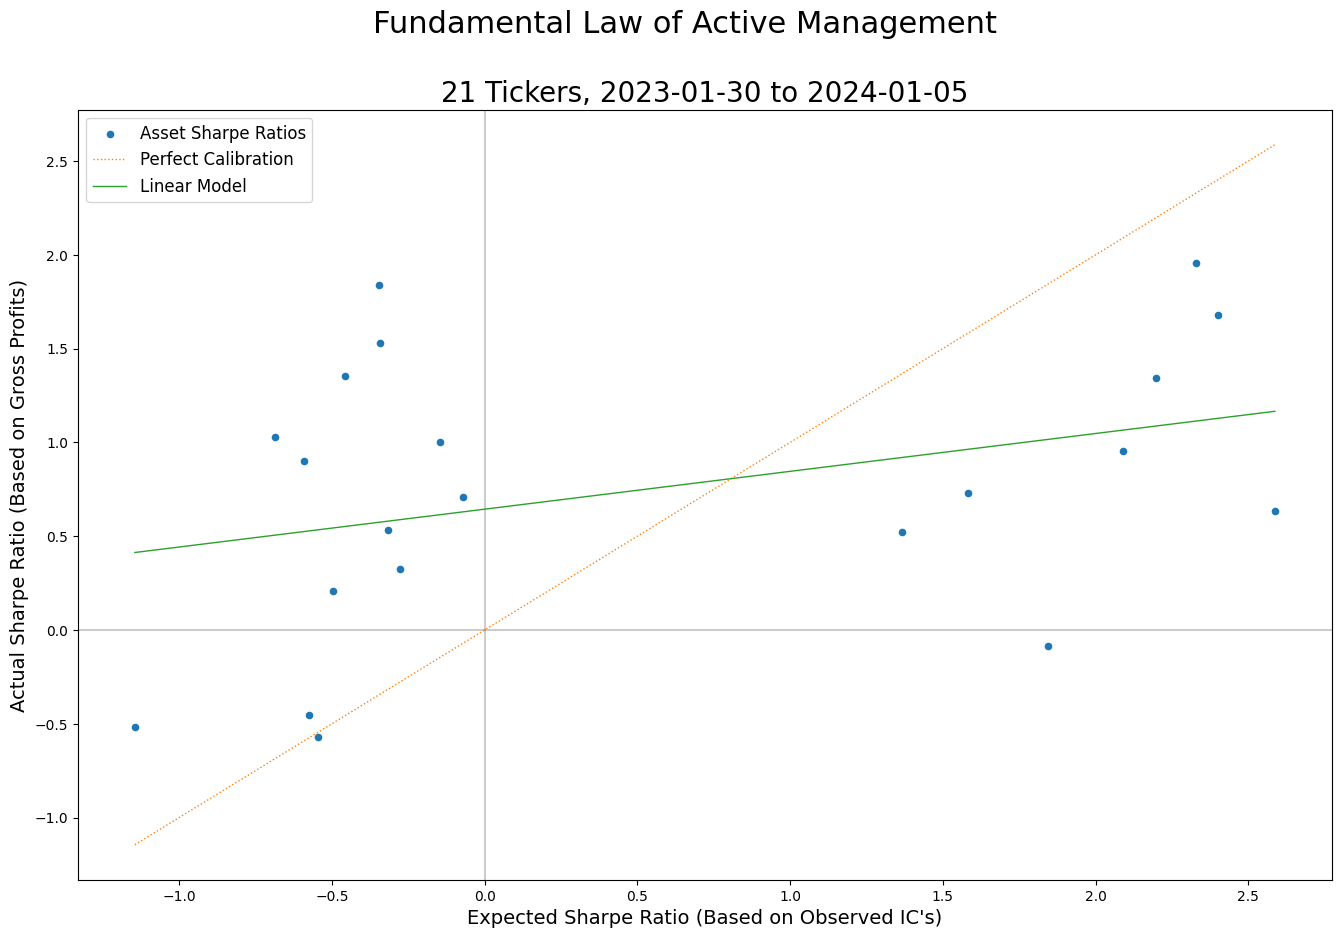

In [121]:
figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
data.plot.scatter("Expected","Actual",ax=plot,label="Asset Sharpe Ratios",color='C0')
plot.axhline(color='black',alpha=0.2)
plot.axvline(color='black',alpha=0.2)
x=[data["Expected"].min(),data["Expected"].max()]
y=list(map(lambda x:model.params[0]+model.params[1]*x,x))
plot.plot(x,x,':',label="Perfect Calibration",color='C1',linewidth=1)
plot.plot(x,y,'-',label="Linear Model",color='C2',linewidth=1)
plot.legend(fontsize=12)
plot.set_xlabel(plot.get_xlabel()+" Sharpe Ratio (Based on Observed IC's)",fontsize=14)
plot.set_ylabel(plot.get_ylabel()+" Sharpe Ratio (Based on Gross Profits)",fontsize=14)
title="Fundamental Law of Active Management"
figure.suptitle(title,fontsize=22)
plot.set_title("%d Tickers, %s to %s" % (data.shape[0],ics["First"].min(),ics["Last"].max()),fontsize=20)
figure.savefig(title+".png",dpi=300,bbox_inches='tight')